In [2]:
from chaplinfilter import filter

In [3]:
f = filter(verbose=True)
f.read_train_data()

Reading file: /home/davies/Projects/ChaplinFilter/chaplinfilter/data/jitterdata_box4.txt


In [37]:
import pandas as pd
df = pd.read_csv('examples.csv')
df.head()

,ID,teff,teff_err,logg,logg_err,L,L_err
0,70 OphA,5300,60,4.555,0.023,0.59,0.02
1,alpha Cen B,5145,60,4.530,0.018,0.51,0.02
2,tau Cet,5290,60,4.533,0.018,0.50,0.02
3,Sun,5777,60,4.438,0.000,1.00,0.00
4,del Pav,5550,60,4.306,0.034,1.22,0.04


In [55]:
import numpy as np
npts = 1000
ts = np.zeros([len(df), npts, 2])
for iter, row in df.iterrows():
    print(row.ID)
    teff = row.teff + np.random.randn(npts) * row.teff_err
    logg = row.logg + np.random.randn(npts) * row.logg_err
    logL = row.L + np.random.randn(npts) * row.L_err
    results = f(teff, logg, logL)
    ts[iter, :, :] = results

    print(f'Means : {np.mean(results, axis=0)} Std : {np.std(results, axis=0)}')
    print(f'Mean tpE : {np.mean(results[:,0])} Std : {np.std(results[:,0])}')
df['tpE'] = np.mean(ts[:, :, 0], axis=1)
df['tpE_err'] = np.std(ts[:, :, 0], axis=1)
df['tp1'] = np.mean(ts[:, :, 1], axis=1)
df['tp1_err'] = np.std(ts[:, :, 1], axis=1)

70 OphA
Predicting ...
Means : [3.80883589 4.81577349] Std : [0.42844712 0.46485922]
Mean tpE : 3.808835893025007 Std : 0.4284471190035417
alpha Cen B
Predicting ...
Means : [3.22742306 3.59844365] Std : [0.15629858 0.29805341]
Mean tpE : 3.2274230617749953 Std : 0.15629857525212917
tau Cet
Predicting ...
Means : [3.29173135 3.65250991] Std : [0.19448031 0.39595339]
Mean tpE : 3.291731351450002 Std : 0.19448030616273976
Sun
Predicting ...
Means : [12.33227658 10.72861884] Std : [0.25770375 0.0597345 ]
Mean tpE : 12.332276581274986 Std : 0.2577037522479628
del Pav
Predicting ...
Means : [20.49814527 18.58569134] Std : [1.00637952 1.07754683]
Mean tpE : 20.498145273299947 Std : 1.0063795151243113
alpha Cen A
Predicting ...
Means : [28.42588566 22.53916815] Std : [1.7026588  0.96699627]
Mean tpE : 28.42588565849992 Std : 1.7026587994398956
iota Hor
Predicting ...
Means : [29.8465762  22.30082654] Std : [0.82376666 0.51528186]
Mean tpE : 29.846576195274903 Std : 0.8237666620239671
mu Ara
P

In [56]:
df.to_csv('example_results.csv', index=False)

/home/davies/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/davies/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


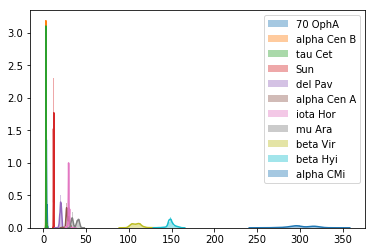

In [57]:
import seaborn as sns
for i in range(len(df)):
    ax = sns.distplot(ts[i,:,0], label=df.loc[i].ID)
ax.legend()

/home/davies/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/davies/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


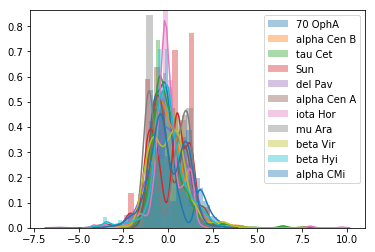

In [58]:
import seaborn as sns
for i in range(len(df)):
    ax = sns.distplot((ts[i,:,0] - np.mean(ts[i,:,0])) / np.std(ts[i,:,0]),  label=df.loc[i].ID)
ax.legend()